In [2]:
!nvidia-smi

Wed Feb 19 21:10:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DvsFLdY50aWE0jarRwsX")
project = rf.workspace("phd-project").project("wembcars")
version = project.version(5)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WembCars--5 in yolov11:: 100%|██████████| 31998/31998 [00:04<00:00, 6859.89it/s]


In [7]:
dataset.location

'/content/WembCars--5'

In [8]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11s.pt" epochs=25 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 207MB/s]
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/WembCars--5/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

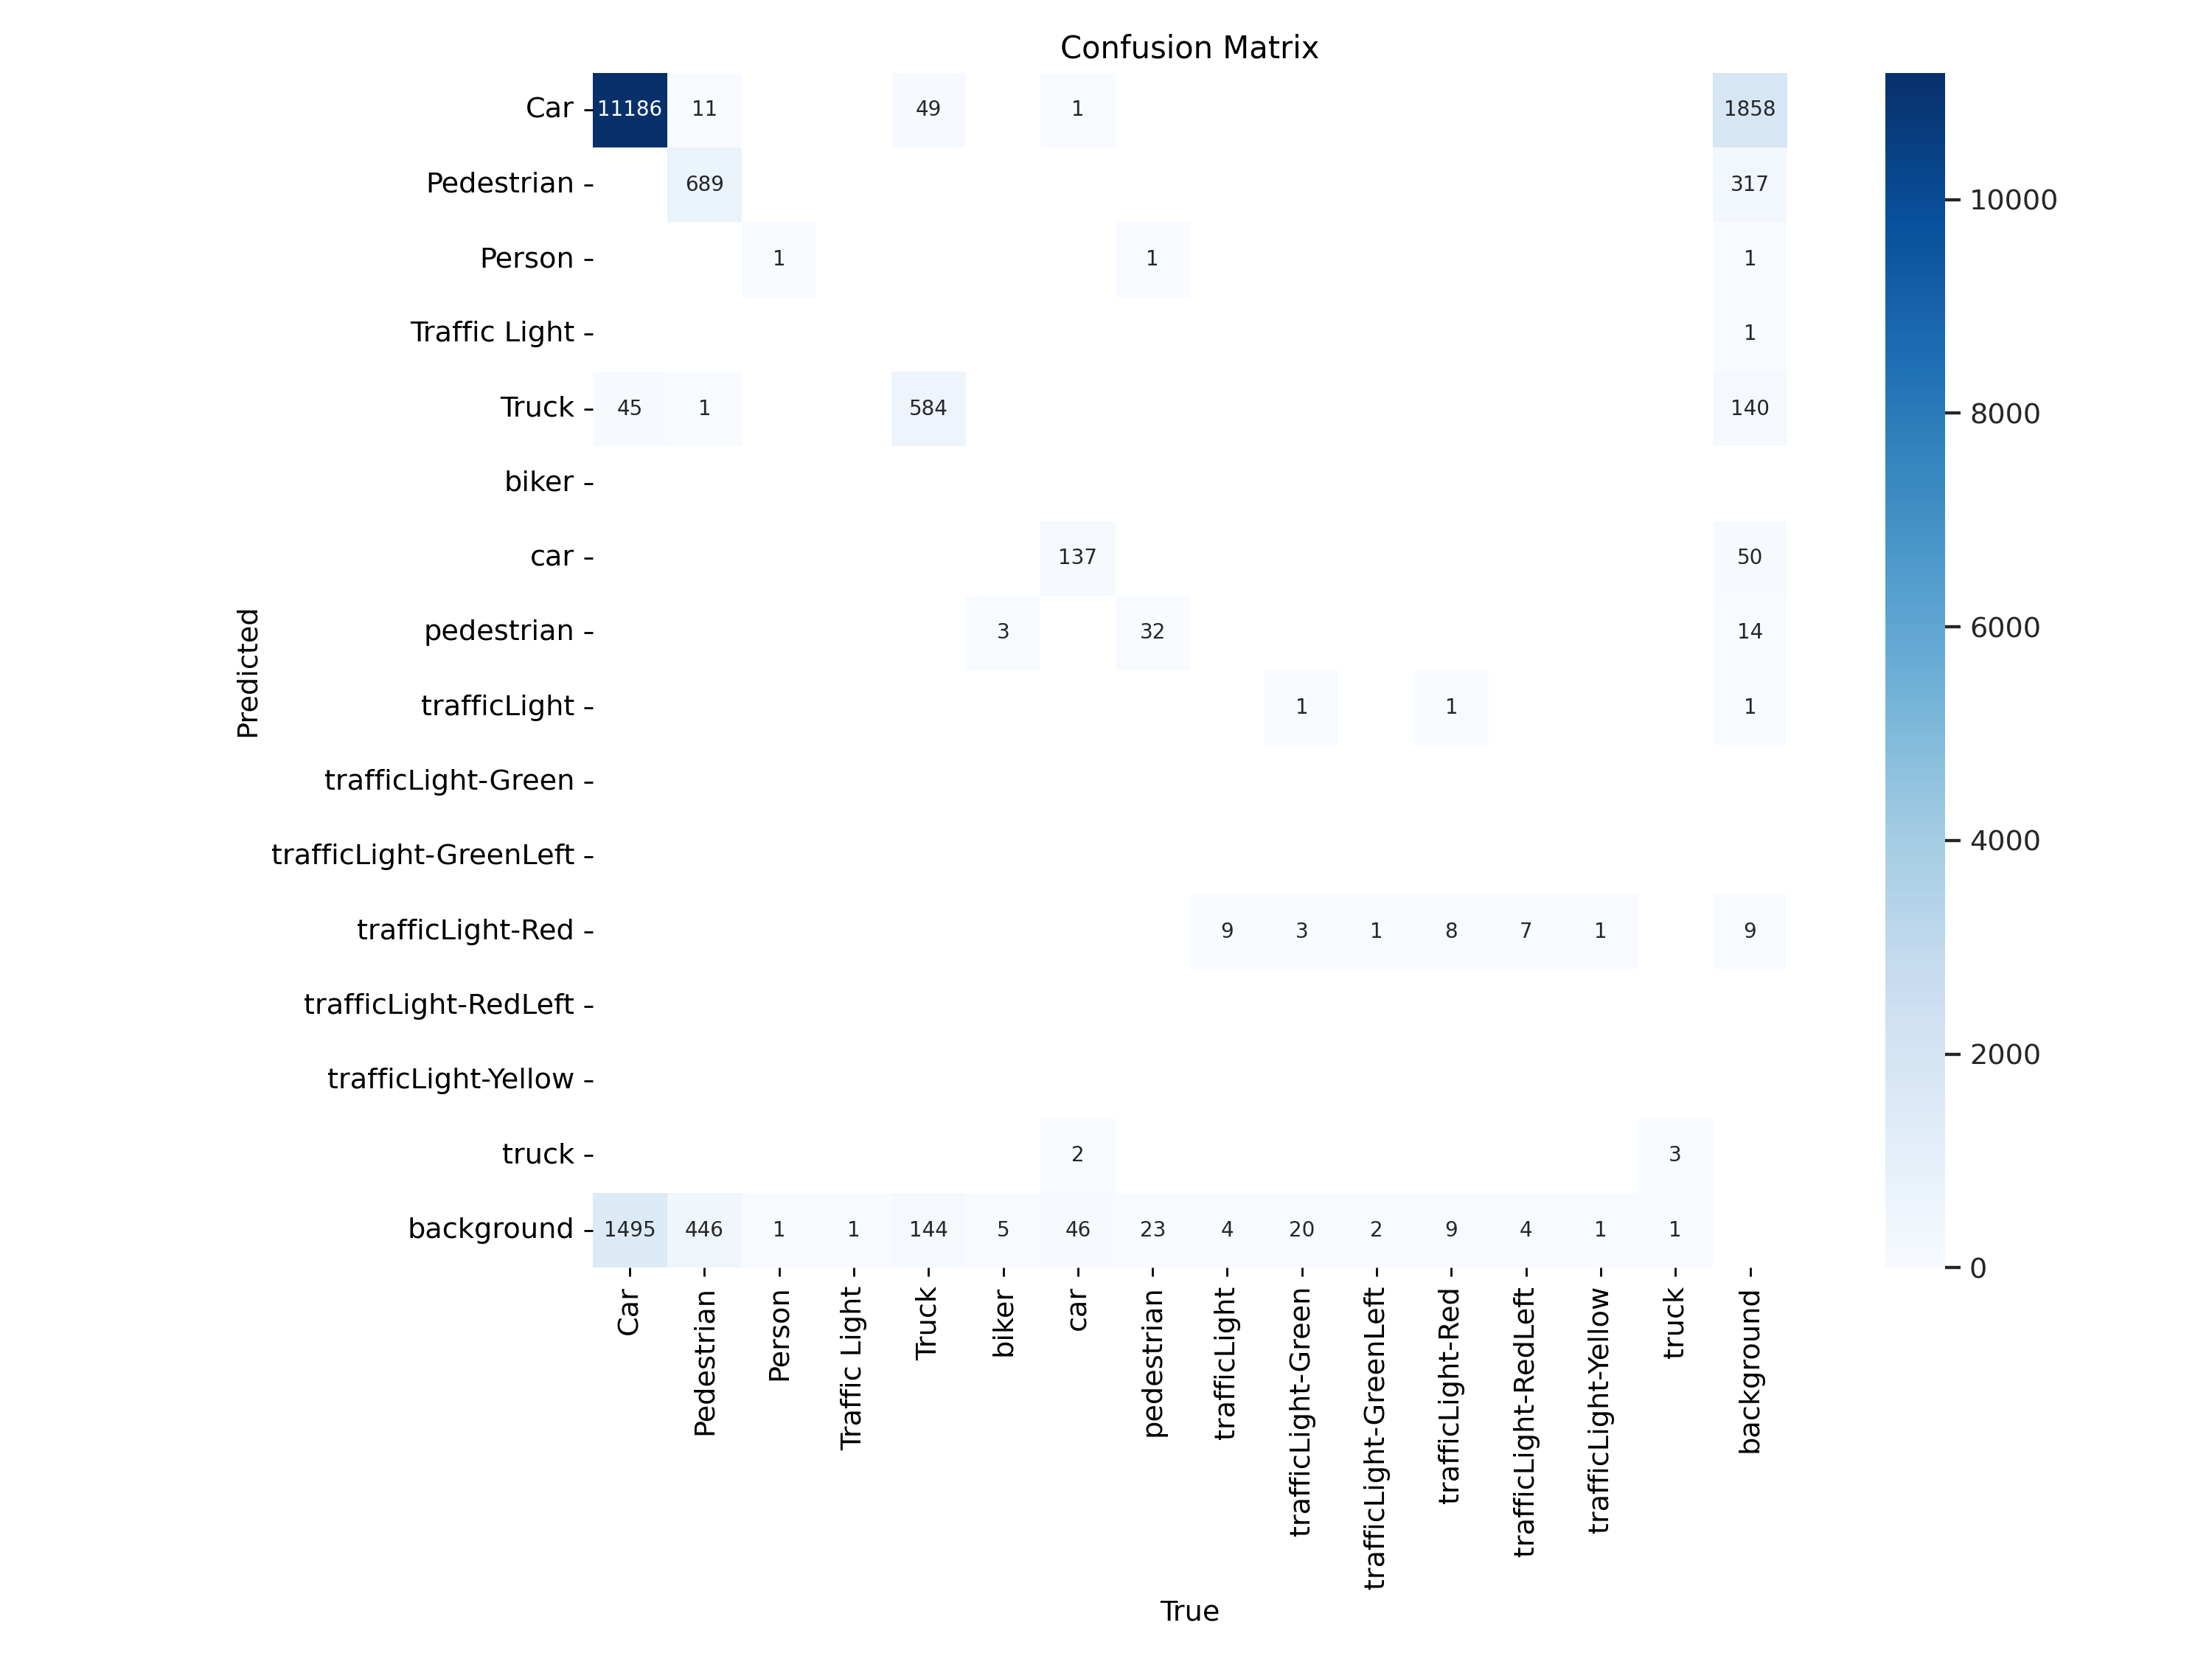

In [9]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

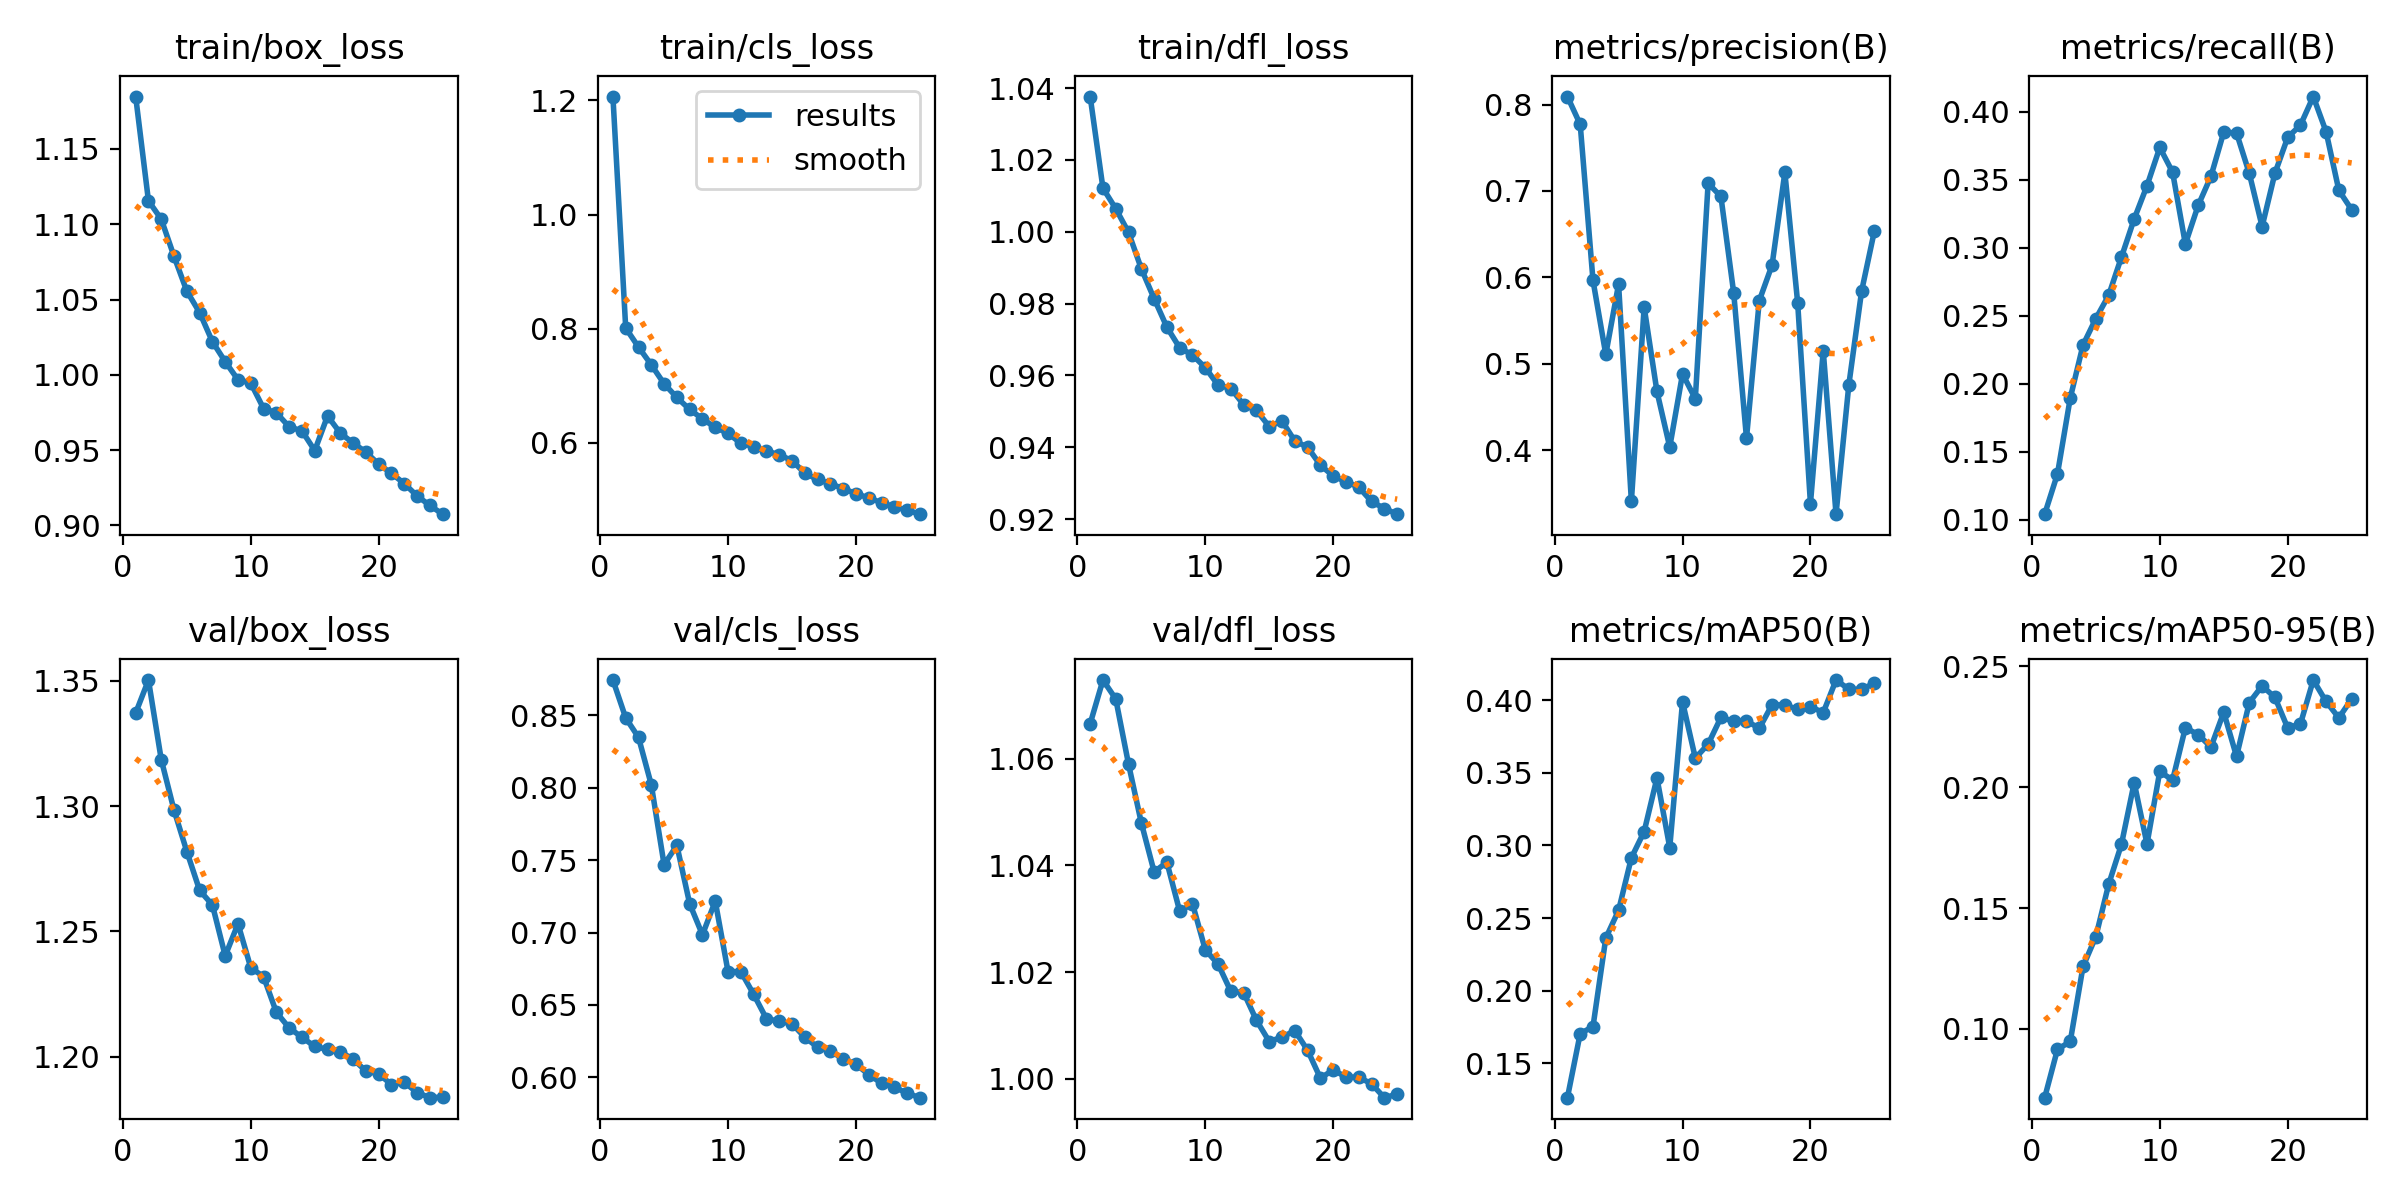

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

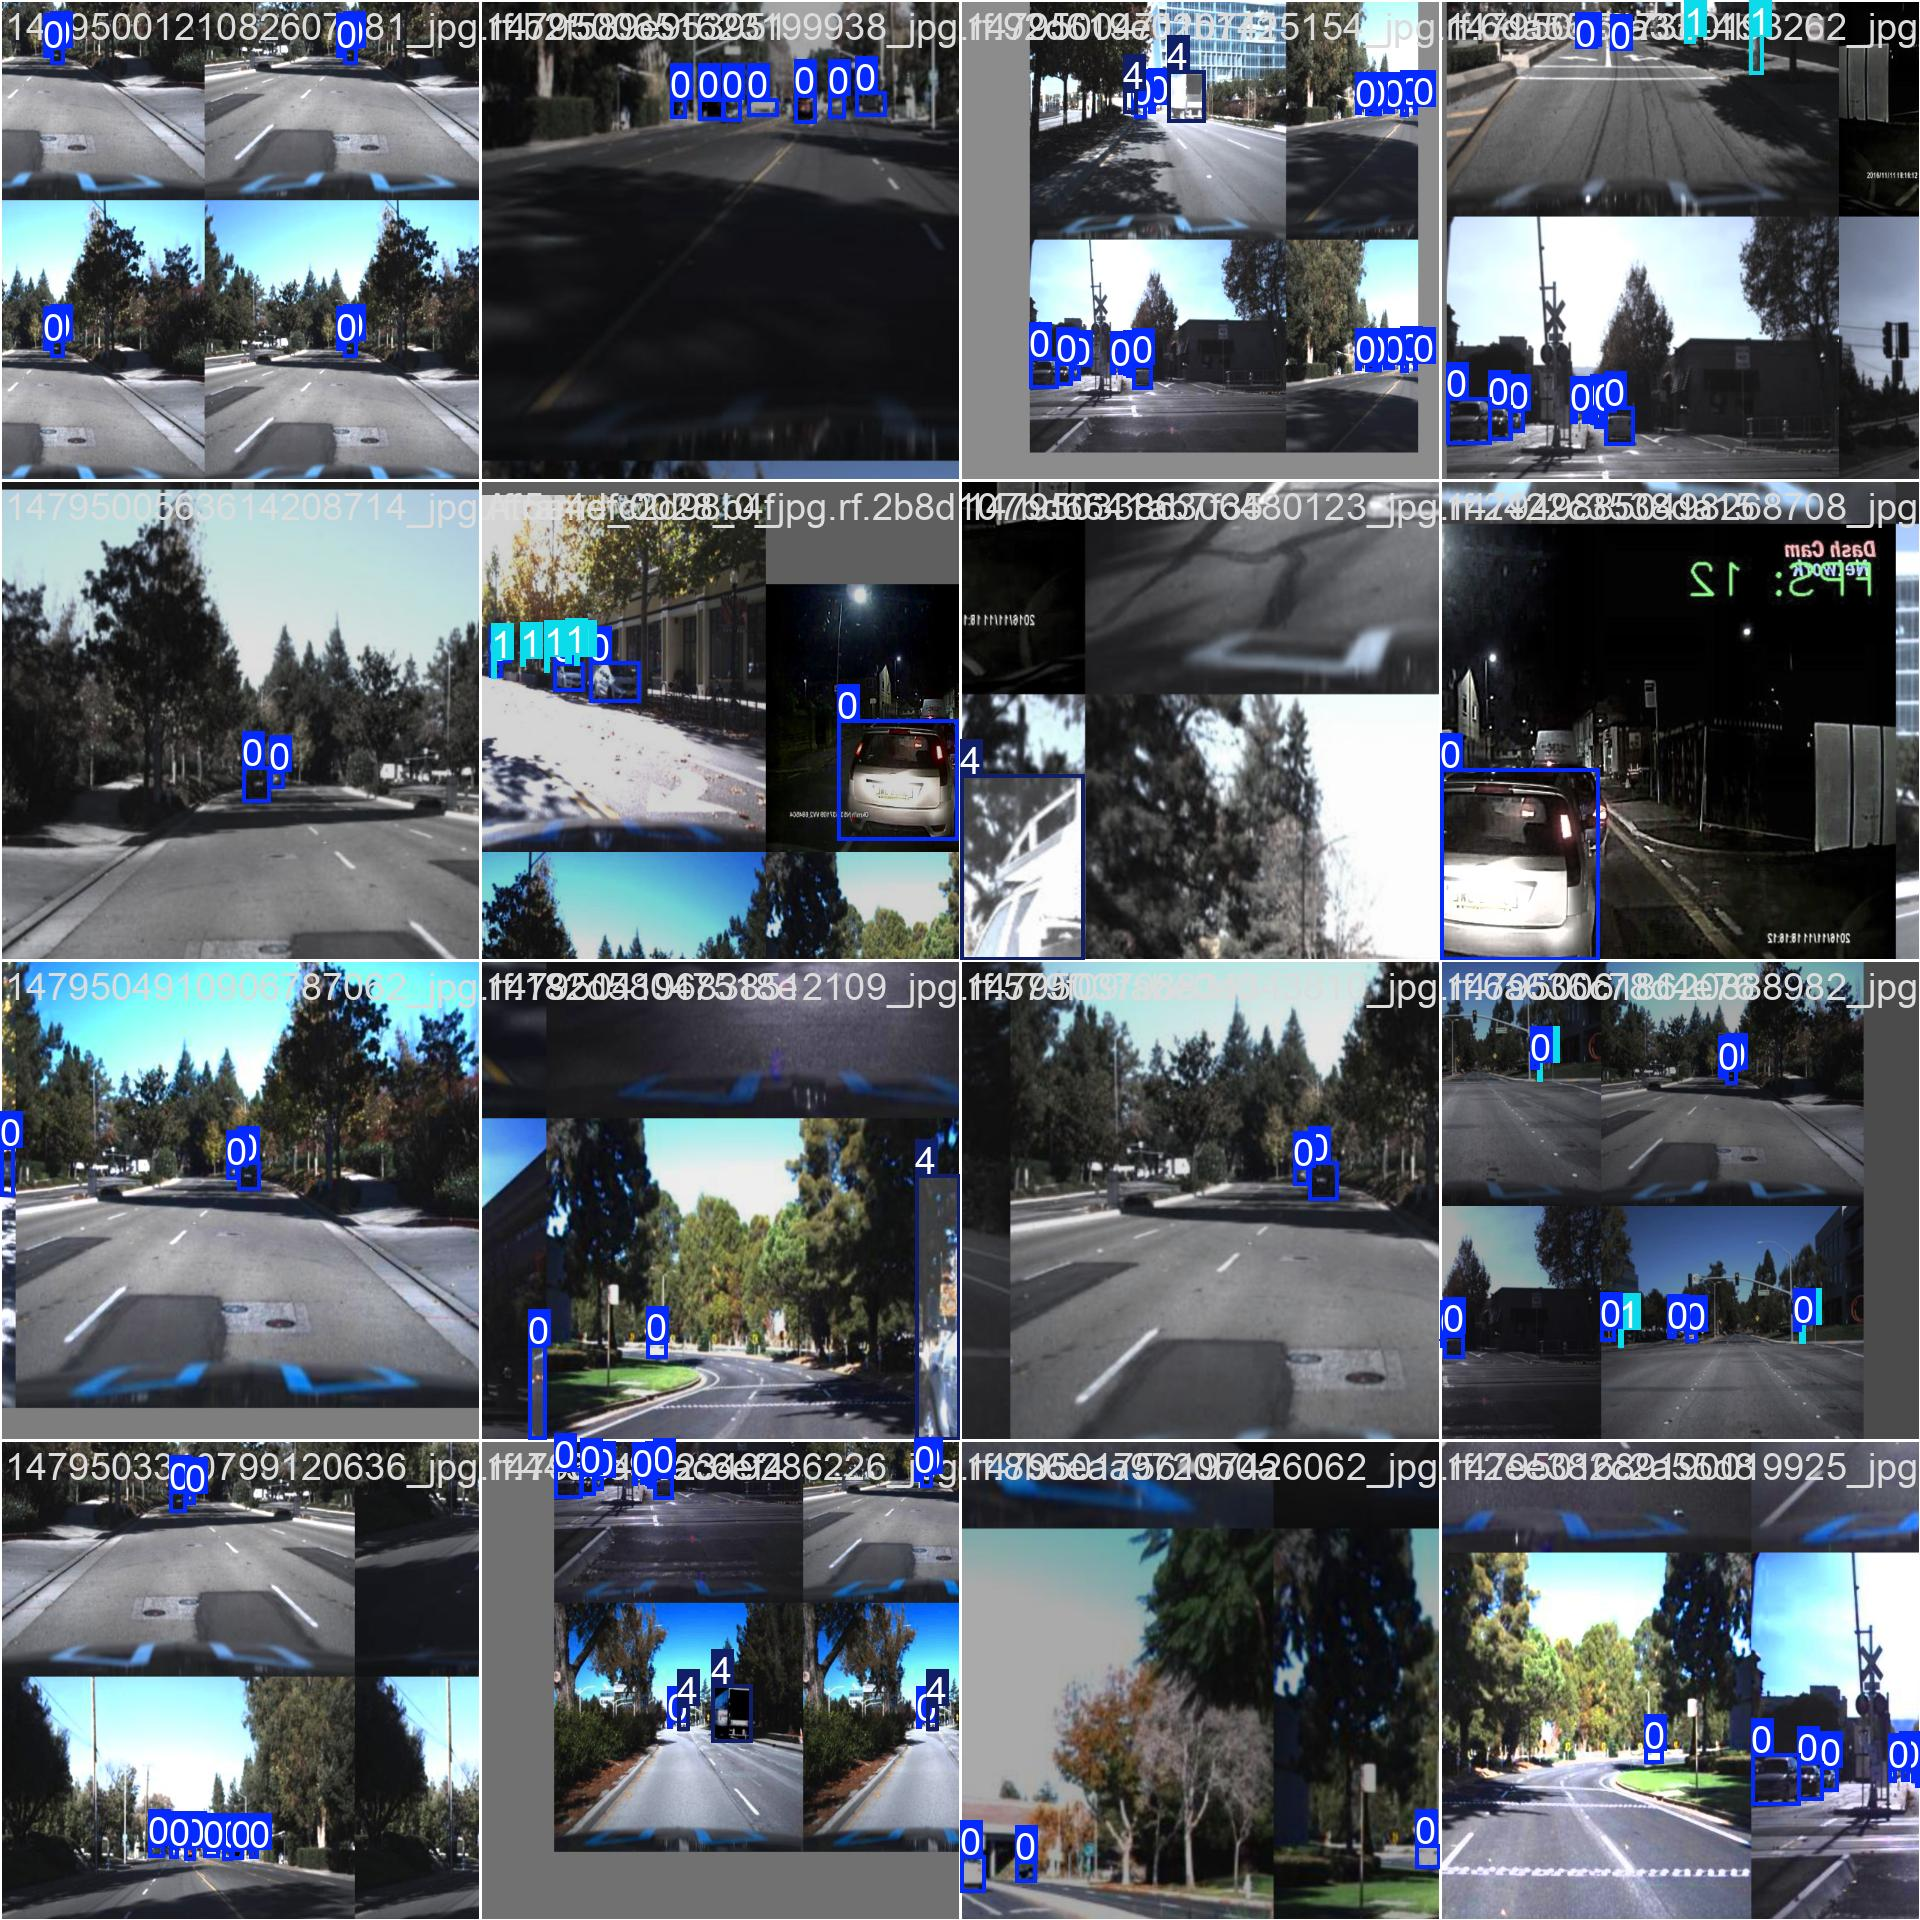

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

In [12]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/WembCars--5/valid/labels.cache... 1902 images, 1 backgrounds, 0 corrupt: 100% 1902/1902 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/WembCars--5/valid/images/1479504475379530534_jpg.rf.740d2338e0bdfedab14e999bf8b07193.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 119/119 [00:28<00:00,  4.25it/s]
                   all       1902      14978      0.327      0.411      0.417      0.248
                   Car       1845      12726      0.771      0.898      0.921      0.617
            Pedestrian        456       1147      0.549      0.639      0.637      0.314
                Person          1          2      0.225        0.5      0.543      0.455
         Traffic Light          1          1          0          0          0   

In [13]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs

image 1/945 /content/WembCars--5/test/images/0001_jpg.rf.f9fbe88befeb9d95bdb23e1948028328.jpg: 384x640 11 Cars, 2 Persons, 46.9ms
image 2/945 /content/WembCars--5/test/images/0016_jpg.rf.94925bc35aa5c151995f87eab0f0ca54.jpg: 384x640 11 Cars, 4 Persons, 10.9ms
image 3/945 /content/WembCars--5/test/images/1478020297191534570_jpg.rf.c8fb7cf919e0ab2f3b66f173faef8cf1.jpg: 640x640 2 cars, 2 trafficLight-Reds, 16.3ms
image 4/945 /content/WembCars--5/test/images/1478020330195120674_jpg.rf.fc732adb019236e6b110b983e6f0219d.jpg: 640x640 5 cars, 15.6ms
image 5/945 /content/WembCars--5/test/images/1478732145467524784_jpg.rf.d109191cdd5ad4c1cb297a80a56ae682.jpg: 640x640 7 cars, 2 trucks, 15.6ms
image 6/945 /content/WembCars--5/test/images/1478732166112903425_jpg.rf.539d6573cb7014918271cff2890876e2.jpg: 640x640 6 cars, 4 trafficLight-Re

In [14]:
!gdown --fuzzy "https://drive.google.com/file/d/1wvxNIBtkX2DjlkegJAMMHz8MlKZVbCfZ/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1wvxNIBtkX2DjlkegJAMMHz8MlKZVbCfZ
To: /content/videotest.mp4
100% 50.5M/50.5M [00:02<00:00, 20.5MB/s]


In [16]:
!gdown --fuzzy "https://drive.google.com/file/d/1tqc2tkzv4dSnMmsjLY_IkLM3A4rHMKVB/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1tqc2tkzv4dSnMmsjLY_IkLM3A4rHMKVB
To: /content/vidtest.mp4
100% 6.16M/6.16M [00:00<00:00, 17.6MB/s]


In [15]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=videotest.mp4 save=True

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs

video 1/1 (frame 1/1112) /content/videotest.mp4: 384x640 1 Truck, 3 cars, 1 trafficLight-Red, 46.0ms
video 1/1 (frame 2/1112) /content/videotest.mp4: 384x640 2 cars, 19.8ms
video 1/1 (frame 3/1112) /content/videotest.mp4: 384x640 2 cars, 11.1ms
video 1/1 (frame 4/1112) /content/videotest.mp4: 384x640 2 cars, 11.1ms
video 1/1 (frame 5/1112) /content/videotest.mp4: 384x640 1 Truck, 3 cars, 11.8ms
video 1/1 (frame 6/1112) /content/videotest.mp4: 384x640 2 cars, 12.0ms
video 1/1 (frame 7/1112) /content/videotest.mp4: 384x640 1 Truck, 3 cars, 12.5ms
video 1/1 (frame 8/1112) /content/videotest.mp4: 384x640 3 cars, 12.6ms
video 1/1 (frame 9/1112) /content/videotest.mp4: 384x640 1 Truck, 3 cars, 1 trafficLight-Red, 14.4ms
video 1/1 (frame 10/1112) /content/videotest.mp4: 384x640 1 Truck, 3 cars, 2 trafficLight-Reds, 1 truck, 12.1

In [17]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=vidtest.mp4 save=True

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,418,605 parameters, 0 gradients, 21.3 GFLOPs

video 1/1 (frame 1/529) /content/vidtest.mp4: 384x640 1 Truck, 4 cars, 1 truck, 49.5ms
video 1/1 (frame 2/529) /content/vidtest.mp4: 384x640 2 cars, 16.7ms
video 1/1 (frame 3/529) /content/vidtest.mp4: 384x640 3 cars, 2 trucks, 12.4ms
video 1/1 (frame 4/529) /content/vidtest.mp4: 384x640 2 cars, 1 truck, 12.0ms
video 1/1 (frame 5/529) /content/vidtest.mp4: 384x640 2 cars, 1 truck, 13.0ms
video 1/1 (frame 6/529) /content/vidtest.mp4: 384x640 3 cars, 1 truck, 12.0ms
video 1/1 (frame 7/529) /content/vidtest.mp4: 384x640 3 cars, 1 truck, 15.1ms
video 1/1 (frame 8/529) /content/vidtest.mp4: 384x640 3 cars, 1 truck, 11.9ms
video 1/1 (frame 9/529) /content/vidtest.mp4: 384x640 1 Truck, 3 cars, 1 trafficLight-Red, 1 truck, 11.4ms
video 1/1 (frame 10/529) /content/vidtest.mp4: 384x640 1 Truck, 3 cars, 1 trafficLight-Red, 1 truck, 